In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import pickle
import os
from glob import glob

In [20]:
data = pickle.load(open("../data/traj_data.pkl", "rb"))
len(data['Reward'])

120

In [21]:
colors = ['#BCD2E855','#BCD2E8FF', '#91BAD655', '#91BAD6FF','#73A5C655','#73A5C6FF', '#528AAE55', '#528AAEFF', '#2E598455','#2E5984FF','#1E3F6655','#1E3F66FF','#1E3F66FF']

In [22]:
div_dactor = len(data['Reward'][:222]) // 10

In [30]:
div_dactor

12

In [23]:
# pickle.dump(data, open("../data/trained_traj_data_skill2.pkl", "wb"))

In [24]:
# c_m = matplotlib.cm.cool
# create a ScalarMappable and initialize a data structure
import matplotlib
cmap = plt.cm.get_cmap('Blues')

norm = matplotlib.colors.Normalize(
    vmin=np.min(range(len(data['Reward'][:222]))),
    vmax=np.max(range(len(data['Reward'][:222])))
)
s_m = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
s_m.set_array([])


In [25]:
ticker = np.linspace(-2.46, 10, len(data['Reward'][:222]))

In [26]:
for i in range(len(os.listdir('../traj_imgs/traj_skill2/'))):
    os.rename(f'../traj_imgs/traj_skill2/{222+i}.png', f'../traj_imgs/traj_skill2/{i}.png')

FileNotFoundError: [Errno 2] No such file or directory: '../traj_imgs/traj_skill2/222.png' -> '../traj_imgs/traj_skill2/0.png'

Text(74.0, 0.5, 'Height Z')

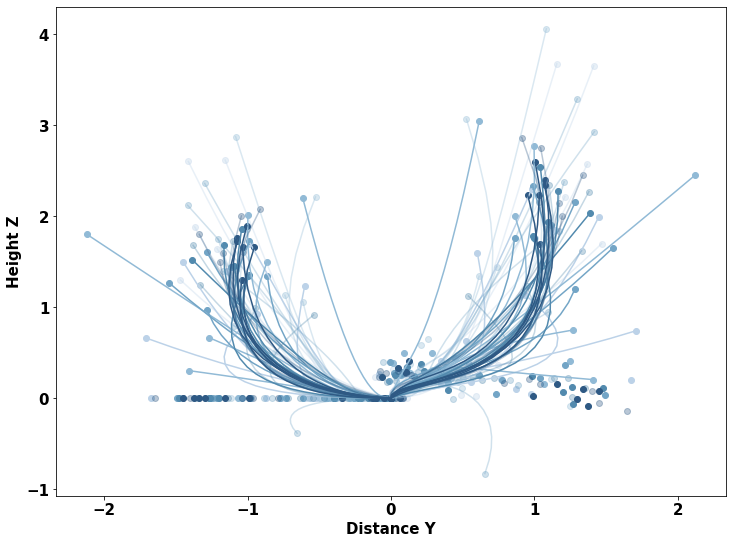

In [28]:

plt.figure(figsize=(12,9))

for i in range(len(data['Reward'][:222])):
    pts, curves, rewards = data["Points"][i],data["Trajectory"][i],data["Reward"][i]
    plt.scatter(pts.T[0], pts.T[1], c = colors[i//div_dactor])
    plt.plot(curves[0], curves[1], c = colors[i//div_dactor], linewidth=1.5)
    plt.savefig(f"../traj_imgs/traj_skill2/{len(os.listdir('../traj_imgs/traj_skill2/'))}.png", dpi=300)
    

plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 15
# plt.xaxis.set_tick_params(labelsize=20)
# plt.yaxis.set_tick_params(labelsize=20)
plt.xlabel("Distance Y", fontsize=15, color= 'black', fontweight='bold')
plt.ylabel("Height Z",   fontsize=15, color= 'black', fontweight='bold')

AttributeError: 'AxesSubplot' object has no attribute 'set_major_locator'

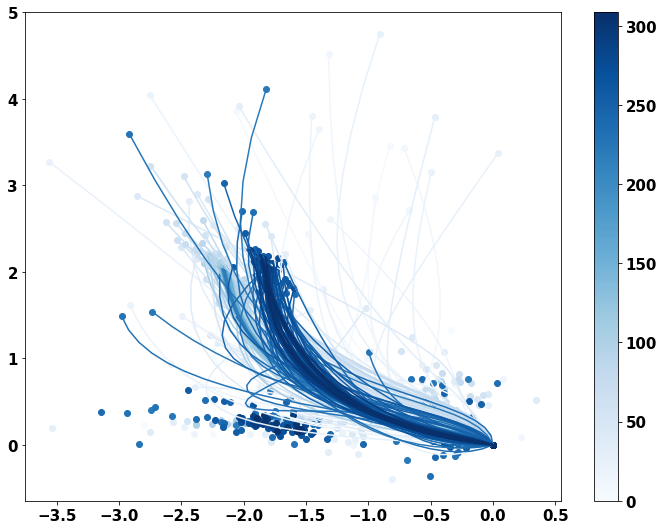

In [39]:
plt.figure(figsize=(12,9))
for i in range(len(data['Reward'])):
    pts, curves, rewards = data["Points"][i],data["Trajectory"][i],data["Reward"][i]
#     plt.scatter(pts.T[0], pts.T[1], c = colors[i//div_dactor])
#     plt.plot(curves[0], curves[1], c = colors[i//div_dactor], linewidth=1.5)
    plt.scatter(pts.T[0], pts.T[1], color = s_m.to_rgba(i))
    plt.plot(curves[0], curves[1], color=s_m.to_rgba(i), linewidth=1.5)
cbar = plt.colorbar(s_m)
cbar.ax.set_major_locator(ticker.FixedLocator([-2.46, 0, 10]))
cbar.ax.set_ylabel("Reward")

In [ ]:
pickles = glob('../data/*trained.pkl')
robot_data = {0:[],1:[],2:[]}
for i in pickles:
    if 'skill1' in i:
        pass
#         robot_data[0].append(i)
    elif 'skill2' in i:
        robot_data[1].append(i)
    else:
        robot_data[2].append(i)
        
robot_data

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.rcParams.update({'font.size': 20})

robo_rewards = {}
params = ['px1','py1','px2','py2','px3','py3']

for i in robot_data:
    robo_rewards[i] = []
    for path in robot_data[i]:
        with open(path, 'rb') as handle:
            reps_policy_loaded = pickle.load(handle)

        verbose = True
        path_to_reps_info = i
        solve_env_info = reps_policy_loaded['solve_env_info']

        reps_converged = solve_env_info["reps_converged"]
        policy_params_mean = solve_env_info["policy_params_mean"]
        mean_param_hist = solve_env_info["history"]["policy_params_mean"]
        var_diag_param_hist = solve_env_info["history"]["policy_params_var_diag"]
        mean_rew_hist = solve_env_info["history"]["mean_reward"]

        num_params = len(solve_env_info["policy_params_mean"])
        num_reps_attempts = solve_env_info["num_reps_attempts"]

        # this might be a ragged array, so we flatten it
        assert len(mean_rew_hist) == num_reps_attempts
        mean_rew_hist_all_attempts = np.hstack(
            [mean_rew_hist[a] for a in range(num_reps_attempts)]
        )
        iter_param_updates = range(len(mean_rew_hist_all_attempts))

        if verbose:
            print(f'REPS solve info for "{path_to_reps_info}":')
            print(f" -> Solved: {reps_converged}")
            print(f" -> Parameters (mean): {policy_params_mean}")

        num_subplots = num_params + 1
        fig, ax = plt.subplots(num_subplots, 1, sharex=True)
        fig.set_figheight(15)
        fig.set_figwidth(15)
        prop_cycle = plt.rcParams["axes.prop_cycle"]
        colors = cycle(prop_cycle.by_key()["color"])
        for p in range(num_subplots):

            if p == 0:
                # show reward
                robo_rewards[i].append(mean_rew_hist_all_attempts)
#                 REWW.append(mean_rew_hist_all_attempts)
                ax[p].plot(
                    iter_param_updates,
                    mean_rew_hist_all_attempts,
                    ".-",
                    color=next(colors),
                )
                ax[p].grid()
                ax[p].set_ylabel(f"Reward")

            else:
                idx_p = p - 1
                # this might be a ragged array, so we flatten it
                assert len(mean_param_hist) == num_reps_attempts
                mean_param_hist_all_attempts = np.hstack(
                    [
                        np.array(mean_param_hist[a])[:, idx_p]
                        for a in range(num_reps_attempts)
                    ]
                )
                # assert len(mean_param_hist_all_attempts) == (num_reps_param_updates + 1)

                assert len(var_diag_param_hist) == num_reps_attempts
                var_diag_param_hist_all_attempts = np.hstack(
                    [
                        np.array(var_diag_param_hist[a])[:, idx_p]
                        for a in range(num_reps_attempts)
                    ]
                )

                stdev_diag_param_hist_all_attempts = np.sqrt(
                    var_diag_param_hist_all_attempts
                )

                assert len(mean_param_hist_all_attempts) == len(
                    stdev_diag_param_hist_all_attempts
                )
                assert len(mean_param_hist_all_attempts) == len(iter_param_updates)

                mean_p_stdev = (
                    mean_param_hist_all_attempts + stdev_diag_param_hist_all_attempts
                )
                mean_m_stdev = (
                    mean_param_hist_all_attempts - stdev_diag_param_hist_all_attempts
                )

                this_color = next(colors)

                ax[p].plot(
                    iter_param_updates,
                    mean_param_hist_all_attempts,
                    ".-",
                    color=this_color,
                )
                ax[p].fill_between(
                    iter_param_updates,
                    mean_p_stdev,
                    mean_m_stdev,
                    alpha=0.25,
                    color=this_color,
                )
                ax[p].grid()
                ax[p].set_ylabel(f"{params[idx_p]}")

            if p == (num_subplots - 1):
                ax[p].set_xlabel("Policy Updates")
#         plt.suptitle('Convergence of Parameters using REPS')
        plt.xlim((iter_param_updates[0], iter_param_updates[-1]))
        plt.savefig(path.replace('pkl','png'),facecolor='white', transparent=False)
        plt.show()

In [ ]:
robo_rewards

In [ ]:

df = pd.DataFrame(robo_rewards[1]).T.fillna(0)
minv = df.min(axis=1).values
maxv = df.max(axis=1).values

# np.max([np.max(i) for i in robo_rewards[0]])

In [ ]:
plotting_lists = []

x = []
for rewards in robo_rewards:
    
    df = pd.DataFrame(robo_rewards[rewards]).T.fillna(0)
    minv = df.min(axis=1).values
    maxv = df.max(axis=1).values
    meanv = df.mean(axis=1).values
    std_dev = df.std(axis=1).values
    print(std_dev)
    if len(meanv)>len(x): x = range(len(meanv))
    plotting_lists.append((x, minv, maxv, meanv))

In [ ]:
color = ['orange', 'blue', "red"]
plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 16})

plotting_lists = []

x = []
for rewards in robo_rewards:
    
    df = pd.DataFrame(robo_rewards[rewards]).T.fillna(0)
    meanv = df.mean(axis=1).values
    std_dev = df.std(axis=1).values
    minv = meanv - std_dev*2/np.sqrt(7)
    maxv = meanv + std_dev*2/np.sqrt(7)
    if len(meanv)>len(x): x = range(len(meanv))
    if len(x) > 3:
        plotting_lists.append((x, minv, maxv, meanv))
#     for mean_rew_hist_all_attempts in robo_rewards[rewards]:
#         iter_param_updates = range(len(mean_rew_hist_all_attempts))
#         if len(iter_param_updates)>len(x): x = iter_param_updates
#         line = plt.plot(
#             iter_param_updates,
#             mean_rew_hist_all_attempts,
#             ".-",
#             color=color[rewards],
#         )
print(plotting_lists)
for num, lst in enumerate(plotting_lists):
    diff = len(x) - len(lst[3])
    meanv = list(lst[3])
    minv = list(lst[1])
    maxv = list(lst[2])
#     print(meanv)
    for i in range(diff):
        meanv.extend([0])
        minv.extend([0])
        maxv.extend([0])
    
#     print(meanv, diff)
    line = plt.plot(
        x,
        meanv,
        ".-",
        color=color[num],
    )
    plt.grid()
    line[0].set_label(f'Robot {num+1}')
    plt.fill_between(x, minv, maxv, alpha=0.2, color=color[num])
#     plt.title(f"Combined Robot Experiments")

plt.ylabel(f"Reward")
plt.xlabel("Policy Updates")
plt.legend()
#     plt.title(f"Robot_{rewards}")
plt.savefig(f'../data/rewards_combined.png', facecolor="white")
plt.show()

In [ ]:
robo_best_params = {}

for i in robot_data:
    robo_best_params[i] = []
    for path in robot_data[i]:
        with open(path, 'rb') as handle:
            reps_policy_loaded = pickle.load(handle)

        solve_env_info = reps_policy_loaded['solve_env_info']

        reps_converged = solve_env_info["reps_converged"]
        policy_params_mean = solve_env_info["policy_params_mean"]
        mean_param_hist = solve_env_info["history"]["policy_params_mean"]
        var_diag_param_hist = solve_env_info["history"]["policy_params_var_diag"]
        mean_rew_hist = solve_env_info["history"]["mean_reward"]

        num_params = len(solve_env_info["policy_params_mean"])
        num_reps_attempts = solve_env_info["num_reps_attempts"]

        mean_rew_hist_all_attempts = np.hstack([mean_rew_hist[a] for a in range(num_reps_attempts)]        )

        num_subplots = num_params + 1
        for p in range(num_subplots):
            if p==0 or p==4: 
#                 print(mean_rew_hist_all_attempts[-1])
                continue
            else:
                idx_p = p-1
                mean_param_hist_all_attempts = np.hstack([np.array(mean_param_hist[a])[:, idx_p] for a in range(num_reps_attempts)])
                var_diag_param_hist_all_attempts = np.hstack([np.array(var_diag_param_hist[a])[:, idx_p] for a in range(num_reps_attempts)])

                stdev_diag_param_hist_all_attempts = np.sqrt(var_diag_param_hist_all_attempts)

#                 print(mean_param_hist_all_attempts[-1], stdev_diag_param_hist_all_attempts[-1])
                robo_best_params[i].append((mean_param_hist_all_attempts[-1], stdev_diag_param_hist_all_attempts[-1]))

In [ ]:
robo_best_params[0]

In [ ]:
rho1, theta1, rho2 = robo_best_params[2][6:9]
theta2 = rho2

rho1s = np.array([np.random.multivariate_normal(
                    mean=[rho1[0]],
                    cov=np.eye(1)*rho1[1]**2,
                    size=1,) for i in range(100)])
theta1s = np.array([np.random.multivariate_normal(
                    mean=[theta1[0]],
                    cov=np.eye(1)*theta1[1]**2,
                    size=1,) for i in range(100)])
rho2s = np.array([np.random.multivariate_normal(
                    mean=[rho2[0]],
                    cov=np.eye(1)*rho2[1]**2,
                    size=1,) for i in range(100)])
theta2s = np.array([np.random.multivariate_normal(
                    mean=[theta2[0]],
                    cov=np.eye(1)*theta2[1]**2,
                    size=1,) for i in range(100)])
# print(theta)
# print(np.min(a),np.max(a))
temp = (rho1s + 1)*(8.5)
temp = (theta2s + 1)*(180)
print(np.min(temp),np.max(temp))

In [ ]:
import potentiometer_complex

test_robot = 3
pot = potentiometer_complex.Potentiometer(test_robot)

robo_dict = {
"Robot0": [[-3, 8], [-7,5]],
"Robot2": [[-5, 6], [-11,1]],
"Robot3": [[-9, 6], [-11,2]],
}


pot.set_resistance(5000, 10000)
pot.set_points(*robo_dict[f'Robot{test_robot}'])

pot.reset()

for i,j,k,l in zip(rho1s[:5], theta1s[:5], rho2s[:5], theta2s[:5]):
    print(i,j,k,l)
    rho1, rho2 = (i + 1)*5, (k + 1)*5
    theta1, theta2 = (j + 1)*np.pi, (l + 1)*np.pi

    if theta1 < pot.theta_ccw_start or theta1>np.pi*4/3:
        print(f"Out of Scope Prediction {theta1/np.pi*180}.")
        continue
    elif theta2 < np.pi*4/3 or theta2 > 2*np.pi:
        print(f"Out of Scope Prediction {theta2/np.pi*180}.")
        continue
    else:
        thetas1 = list(np.linspace(pot.theta_ccw_start, theta1, 3))[1:] 
        thetas2 = list(np.linspace(theta1, theta2, 3))[1:]

        for thetai in thetas1:
            x = rho1*np.cos(thetai)
            y = rho1*np.sin(thetai)
            obs_resistance = pot.delta.go_to(x, y, pot.z_move)

        for thetai in thetas2:
            x = rho2*np.cos(thetai)
            y = rho2*np.sin(thetai)
            obs_resistance = pot.delta.go_to(x, y, pot.z_move)
        obs_resistance = pot.delta.go_to(x, y, pot.z_move)
        obs_resistance = pot.delta.go_to(x, y, pot.z_move)
        print(obs_resistance)
    pot.reset()